In [2]:
import pandas as pd



def optimize_memory(df):
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type == 'int64':
            df[col] = df[col].astype('int32')
        elif col_type == 'float64':
            df[col] = df[col].astype('float32')
        elif col_type == 'object':  # For string-based data
            df[col] = df[col].astype('category')
    return df

chunks = []
train_dataset = r"GUIDE_Train.csv"
# Read the dataset in chunks and process each chunk
for chunk in pd.read_csv(train_dataset, chunksize=100000,low_memory=False):
    chunk = optimize_memory(chunk)
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# Clean up memory
del chunks
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1786,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,1492,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,2573,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,4528,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,3722,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
df.shape

(9516837, 45)

In [4]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [5]:
df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Id                  int32   
 1   OrgId               int32   
 2   IncidentId          int32   
 3   AlertId             int32   
 4   Timestamp           object  
 5   DetectorId          int32   
 6   AlertTitle          int32   
 7   Category            object  
 8   MitreTechniques     object  
 9   IncidentGrade       category
 10  ActionGrouped       object  
 11  ActionGranular      object  
 12  EntityType          object  
 13  EvidenceRole        category
 14  DeviceId            int32   
 15  Sha256              int32   
 16  IpAddress           int32   
 17  Url                 int32   
 18  AccountSid          int32   
 19  AccountUpn          int32   
 20  AccountObjectId     int32   
 21  AccountName         int32   
 22  DeviceName          int32   
 23  NetworkMessageId    int32   
 24

In [7]:
df.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,2.601267e+03,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,1.437479e+03,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.648000e+03,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,2.411000e+03,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,3.863000e+03,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,5.427000e+03,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [8]:
df.isnull().mean()

Id                    0.000000
OrgId                 0.000000
IncidentId            0.000000
AlertId               0.000000
Timestamp             0.000000
DetectorId            0.000000
AlertTitle            0.000000
Category              0.000000
MitreTechniques       0.574601
IncidentGrade         0.005395
ActionGrouped         0.994109
ActionGranular        0.994109
EntityType            0.000000
EvidenceRole          0.000000
DeviceId              0.000000
Sha256                0.000000
IpAddress             0.000000
Url                   0.000000
AccountSid            0.000000
AccountUpn            0.000000
AccountObjectId       0.000000
AccountName           0.000000
DeviceName            0.000000
NetworkMessageId      0.000000
EmailClusterId        0.989827
RegistryKey           0.000000
RegistryValueName     0.000000
RegistryValueData     0.000000
ApplicationId         0.000000
ApplicationName       0.000000
OAuthApplicationId    0.000000
ThreatFamily          0.992132
FileName

In [9]:
missing_percentage = df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop 

Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [10]:
df.drop(columns=columns_to_drop,axis=1, inplace=True)

In [11]:
df.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51340
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [12]:
df = df.dropna(subset=['IncidentGrade'])

In [13]:
df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [14]:
df.duplicated().sum()

542692

In [15]:
df = df.drop_duplicates()
df.shape

(8922805, 35)

In [16]:
df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: count, dtype: int64

In [17]:
df.sample(3)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
7347319,4959,4,67,391,2024-05-29T14:28:38.000Z,8,7,InitialAccess,FalsePositive,Machine,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4655590,1630,41,31604,19855,2024-06-13T15:48:53.000Z,32,9224,Exfiltration,TruePositive,File,...,3421,881,65108,0,3586,5,66,242,1445,10630
9421812,2031,23,176,1269368,2024-06-05T09:36:11.000Z,7,6,InitialAccess,TruePositive,CloudLogonRequest,...,3421,881,289573,117668,3586,5,66,242,1445,10630


C:\Users\POORNIMA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


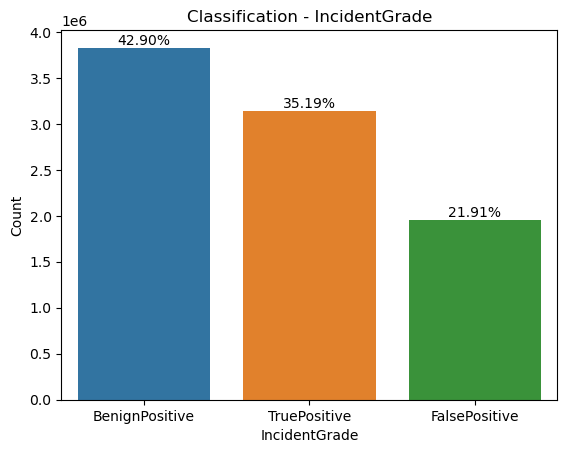

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
class_counts = df['IncidentGrade'].value_counts()
total_samples = len(df)

ax = sns.countplot(data=df, x='IncidentGrade', order=class_counts.index)

for p in ax.patches:
    height = p.get_height()  
    percentage = (height / total_samples) * 100 
  
    ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{percentage:.2f}%', ha='center', va='bottom')


plt.title('Classification - IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')

# Display the plot
plt.show()




In [19]:
df.tail()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
9516832,1806,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,TruePositive,CloudLogonRequest,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516833,3377,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516834,1330,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516835,618,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,BenignPositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516836,1155,16,141721,644106,2024-06-03T23:51:52.000Z,24,348,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [21]:
df.tail()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour
9516832,1806,0,90,496631,2024-06-08 15:26:08+00:00,7,6,InitialAccess,TruePositive,CloudLogonRequest,...,3586,5,66,242,1445,10630,2024,6,8,15
9516833,3377,59,196410,748366,2024-06-06 09:40:08+00:00,2,2,CommandAndControl,BenignPositive,Url,...,3586,5,66,242,1445,10630,2024,6,6,9
9516834,1330,44,14117,7425,2024-06-11 22:51:03+00:00,78,57,Exfiltration,BenignPositive,MailMessage,...,3586,5,66,242,1445,10630,2024,6,11,22
9516835,618,43,644,8973,2024-05-20 23:01:01+00:00,52,10,Impact,BenignPositive,Ip,...,3586,5,66,242,1445,10630,2024,5,20,23
9516836,1155,16,141721,644106,2024-06-03 23:51:52+00:00,24,348,Exfiltration,BenignPositive,MailMessage,...,3586,5,66,242,1445,10630,2024,6,3,23


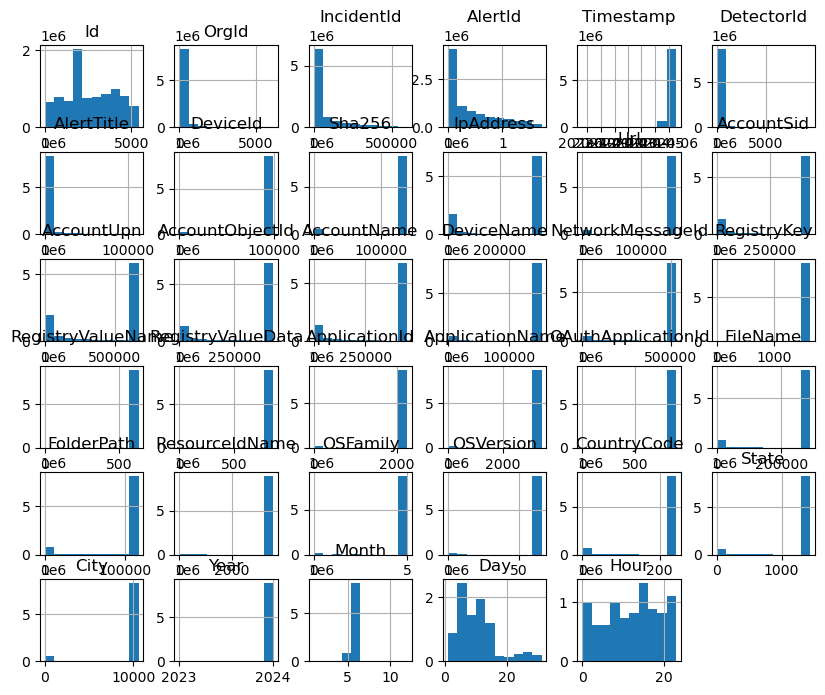

In [22]:
df.hist(figsize=(10,8))
plt.show()

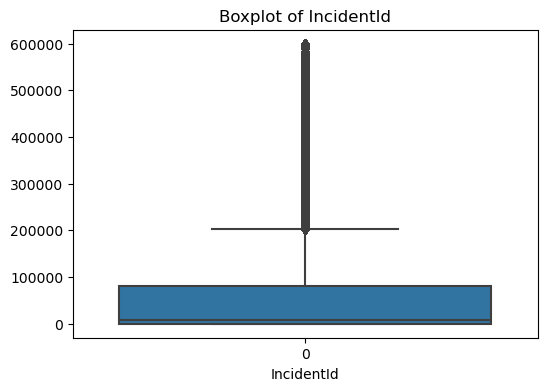

In [23]:
plt.figure(figsize=(6, 4))  # Optional: adjust the size of the plot for better visibility
sns.boxplot(df['IncidentId'])
plt.ticklabel_format(style='plain', axis='y')

# Add title and label
plt.title('Boxplot of IncidentId')
plt.xlabel('IncidentId')  # Label for the x-axis

# Show the plot
plt.show()

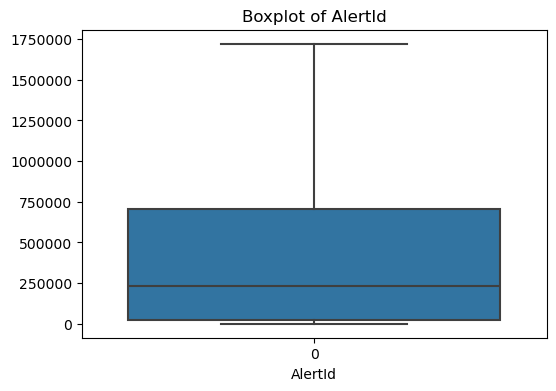

In [24]:
plt.figure(figsize=(6, 4))  # Optional: adjust the size of the plot for better visibility
sns.boxplot(df['AlertId'])
plt.ticklabel_format(style='plain', axis='y')

# Add title and label
plt.title('Boxplot of AlertId')
plt.xlabel('AlertId')  # Label for the x-axis

# Show the plot
plt.show()

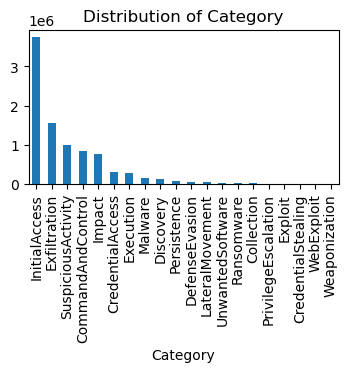

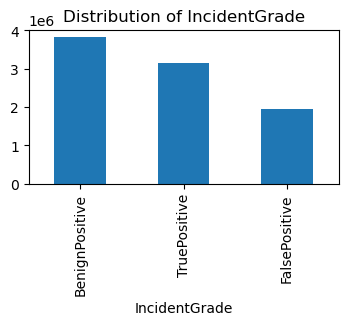

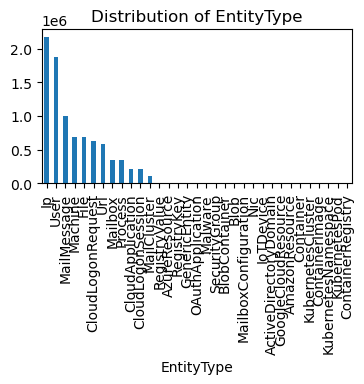

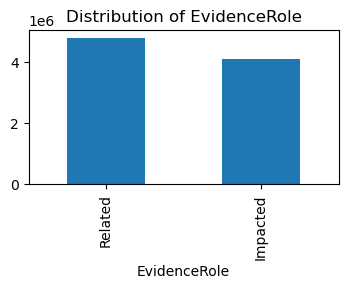

In [25]:
categorical_columns = df.select_dtypes(include=['object','category'])

for col in categorical_columns:
    plt.figure(figsize=(4, 2))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

C:\Users\POORNIMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\POORNIMA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


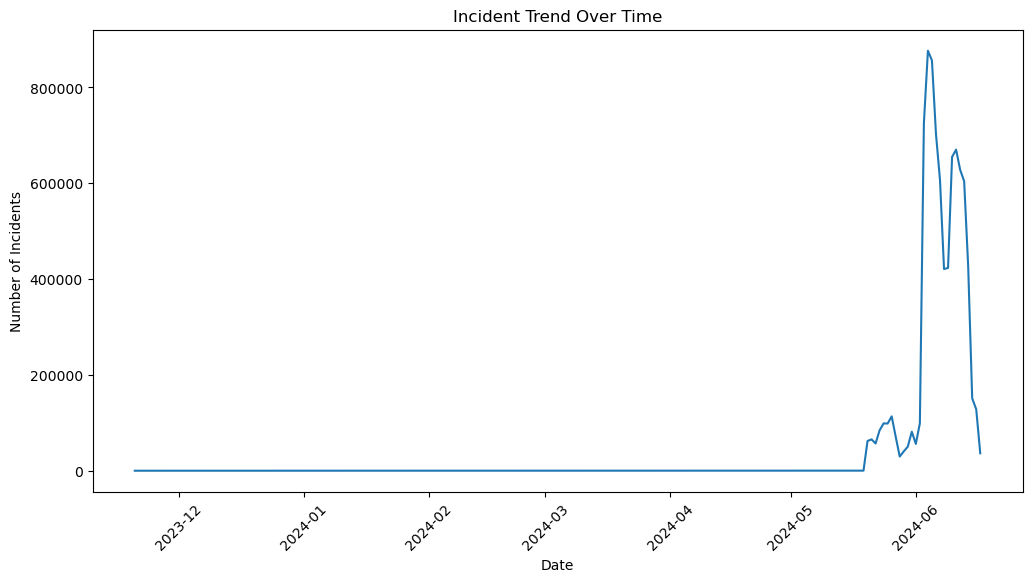

In [26]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
incident_trend = df.groupby(df['Timestamp'].dt.date).size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_trend.index, y=incident_trend.values)
plt.title('Incident Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


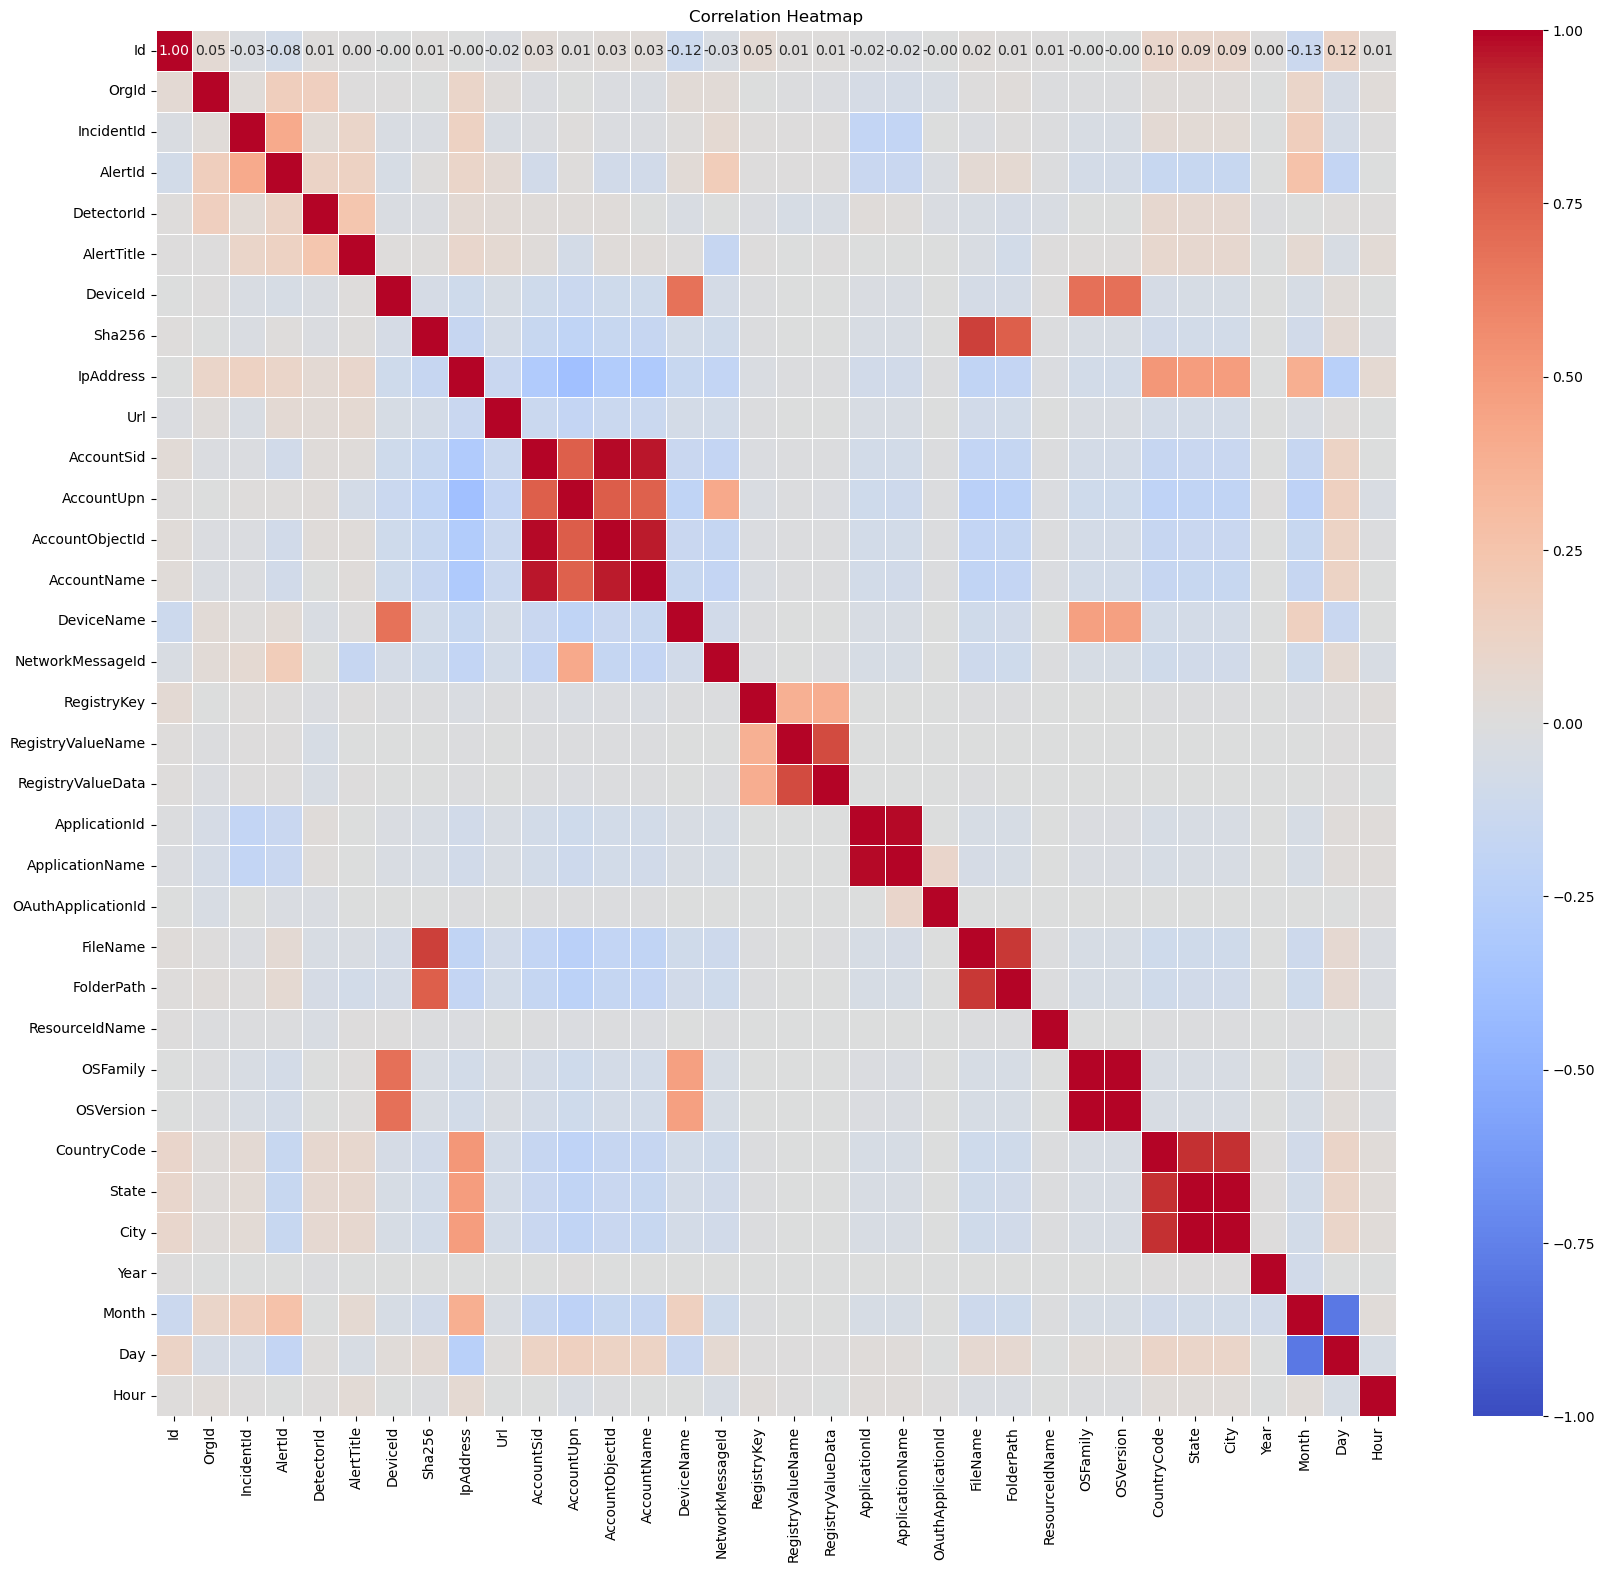

In [27]:
numeric_columns = df.select_dtypes(include=['int8','int16', 'int32', 'int64', 'float64'])

print(numeric_columns.columns)
# heatmap visualization
plt.figure(figsize=(20, 18))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')
                          Id     OrgId  IncidentId   AlertId  DetectorId  \
Id                  1.000000  0.050796   -0.031070 -0.078700    0.014078   
OrgId               0.050796  1.000000    0.027189  0.171764    0.161238   
IncidentId         -0.031070  0.027189    1.000000  0.412175    0.040292   
AlertId            -0.078700  0.171764    0.412175  1.000000    0.118799   
DetectorId          0.014078  0.161238    0.040292  0.118799    1.000000   
AlertTitle        

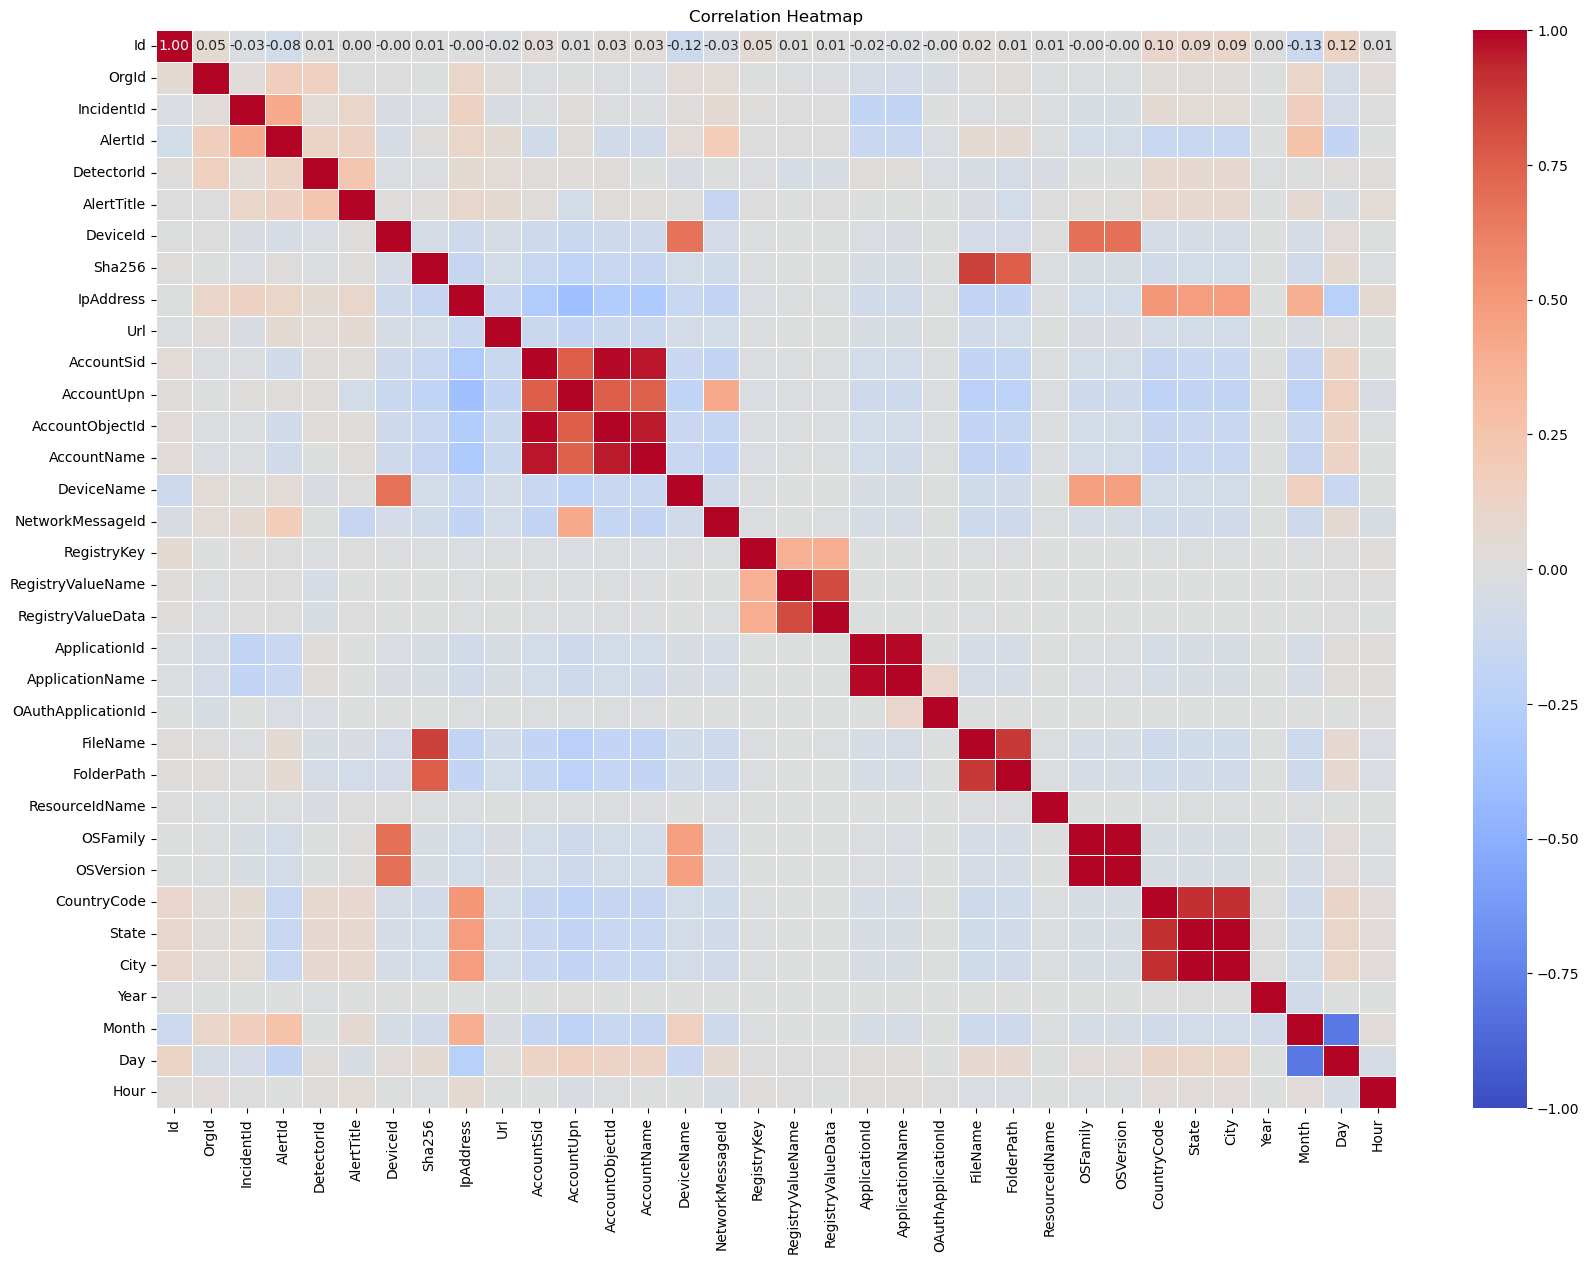

In [28]:


numeric_columns = df.select_dtypes(include=['int8','int16', 'int32', 'int64', 'float64'])


print(numeric_columns.columns)

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display correlation matrix
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [37]:
# columns not usefulin model training
columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 
               'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
              'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName']

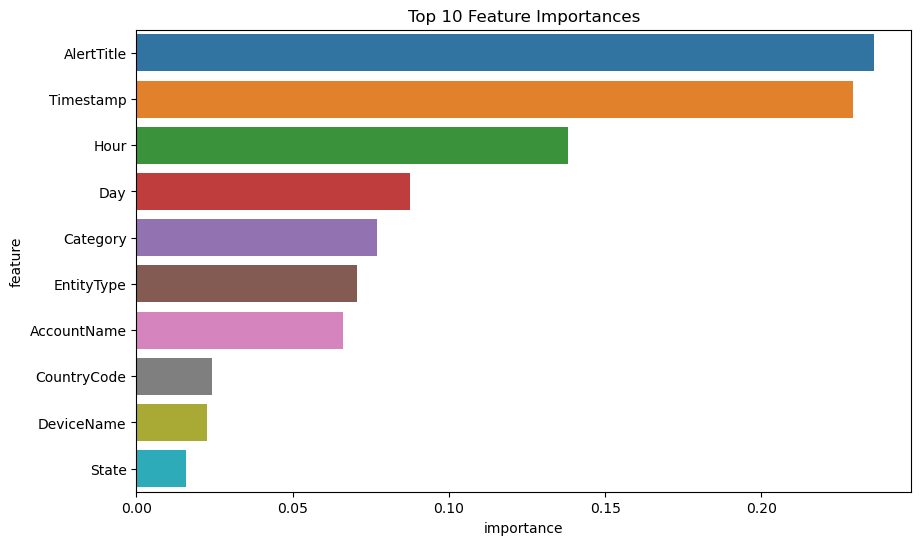

In [38]:
Train_sample = df.sample(frac=0.001, random_state=42)
X = Train_sample.drop(id_columns + ['IncidentGrade'], axis=1, errors='ignore')
y = Train_sample['IncidentGrade']

non_numeric_cols = X.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [39]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [41]:
#Deleting unnecessary columns
df_sample = df.drop(columns=columns, axis=1)

df_sample.columns

Index(['Timestamp', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'Sha256', 'IpAddress', 'AccountName', 'DeviceName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')

In [42]:
df_sample.shape

(8922805, 23)

In [49]:
#Removing outlayers

def outliers(df):
    numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64', 'float64'])
    for col in numeric_features.columns:
        
        Q1 = numeric_features[col].quantile(0.25)
        Q3 = numeric_features[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR   
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df


df_sample_without_outlayers = outliers(df_sample)

In [50]:
df_sample_without_outlayers.shape

(7161370, 23)

In [51]:
df_sample.shape[0]-df_sample_without_outlayers.shape[0]

1761435

In [52]:
df_sample_without_outlayers.to_csv('traindata_no_outlayer.csv', index=False)

In [54]:
import joblib
# Saveing the data using Joblib
joblib.dump(df_sample_without_outlayers, 'train_data.joblib')
train_data = joblib.load('train_data.joblib')
train_data.tail()

,Timestamp,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Sha256,IpAddress,AccountName,DeviceName,...,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour
9516832,2024-06-08 15:26:08+00:00,6,InitialAccess,TruePositive,CloudLogonRequest,Related,138268,360606,453297,153085,...,3586,5,66,242,1445,10630,2024,6,8,15
9516833,2024-06-06 09:40:08+00:00,2,CommandAndControl,BenignPositive,Url,Related,138268,360606,453297,153085,...,3586,5,66,242,1445,10630,2024,6,6,9
9516834,2024-06-11 22:51:03+00:00,57,Exfiltration,BenignPositive,MailMessage,Impacted,138268,360606,453297,153085,...,3586,5,66,242,1445,10630,2024,6,11,22
9516835,2024-05-20 23:01:01+00:00,10,Impact,BenignPositive,Ip,Related,138268,465,453297,153085,...,3586,5,66,242,1445,10630,2024,5,20,23
9516836,2024-06-03 23:51:52+00:00,348,Exfiltration,BenignPositive,MailMessage,Impacted,138268,360606,453297,153085,...,3586,5,66,242,1445,10630,2024,6,3,23


In [55]:
train_data.shape

(7161370, 23)